## What is random sampling

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbySuwichaya/Estimation-Theory-EE523/blob/master/Tutorial1/main.ipynb)

by *Suwichaya Suwanwimolkul, Ph.D.*

The coding exercies and examples are used as parts of  *Lecture I: What is an estimator?*  in **Estimation Theory EE2102523**. 

This notebook covers [Sampling from Distribution](#sampling-from-distribution)
  

Notes.
- The examples of biased vs unbiased estimators are inspried by [Sampling \& Estimation EP.3 by Khalel Corona](https://www.youtube.com/watch?v=pNbDigYLqSY).
-  Don't forget to install the dependency `pip install -r requirements.txt`
- `utils.py` contains the supplenmary implementations for each fucntion used in `Lecture1.ipynb` 

## Sampling from Distribution



### Definition
Suppose that the unknown parameter $\theta$ is in real space, i.e., $\theta\in \mathbb{R}$, we estimate the parameter $\theta$ by **randomly sampling** $X_1, X_2, ..., X_N$ from the same distribution as $X$.

During performing random sampling, we assume that 
 
- $X_1, X_2, ..., X_N$ is drawn independently from a distribution $f_x(X)$, e.g., $f_x(X) = \text{Uni}(a,b)$ or $\text{Gauss}(\mu, \sigma^2)$.   
- $X_1, X_2, ..., X_N$ is assumed to have the same distribution as $X$.    

### Process

In the following example, we will show what does it look like when we sample $X_1, X_2, ..., X_N$  from $X$ that has a uniform distribution, Uniform($a$,$b$) where $a$ = 0, $b$ =1. 


In [ ]:
! pip install numpy pandas tqdm matplotlib joypy

In [2]:
import numpy as np  
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd 
import os

cwd = os.getcwd()

### 1. Generate the sequence of $X$

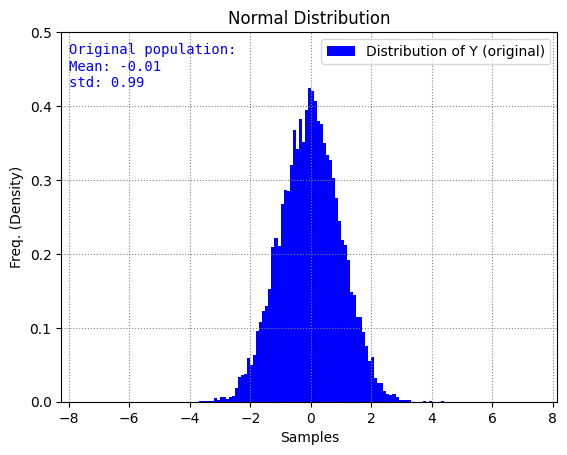

In [3]:
data_population = np.random.randn(10000)
 
textstr_original = '\n'.join([  
    'Original population:',
    "Mean: %.2f"  % np.mean(data_population), 
    "std: %.2f" % np.std(data_population)])

plt.hist(data_population, bins = np.arange(-7.5, 7.5, 0.1), density=True, color="blue", label="Distribution of Y (original)")
plt.ylabel("Freq. (Density)")
plt.xlabel("Samples")
plt.title("Normal Distribution")
plt.text(-8, 0.485, textstr_original,horizontalalignment='left', verticalalignment='top', family='monospace', color="blue")
plt.legend(loc='upper right')
plt.ylim(0,0.5)
plt.grid(  which='both', color='grey', linestyle=':')
plt.savefig("Original_Normally_Distributed.png",
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0,dpi=400)
plt.show()




### 2. Perform the random sampling from $X$

In [4]:
N_list = range(1, 101)# # the number of random samples

replace = True # False
samples=100  # the number of population of each random sample

random_samples = []
for i in N_list:
    random_sample_population = np.random.choice(data_population, samples, replace=replace)
    random_samples.append(random_sample_population)
 

### 3. Implementing a sample mean estimator.

Then, we can implement sample_mean() estimator  as follows:
- Sampling a set of samples (1000 samples) from the given populatoin of the distrubtion of interest. 
- The sampled set will be the population of a random sample 
- Calculate the sample mean using $$ \Theta(X_1, X_2, X_3 ... X_n) = \frac{\sum_{i = 1}^N X_i}{N}$$ 

In [9]:
def sample_mean_simulation(data_population, samples=10000, replace = True, N_select =10): 
    # Inputs:
    # data_population is the populatoin of the distrubtion of interest
    # N_select        is the number of random samples 
    # samples         is the number of samples/populations for each random sample
    # replace         is the type of sampling  

    # Outputs:
    # sample_mean is the estimate of sample meaning using N_select random samples.

    random_sample_list = []
 
    for i in range(N_select):
        data_subsample      = np.random.choice(data_population, samples, replace=replace) 
        random_sample_list.append(data_subsample)       

    # Calculate the sample mean... Note that the summation is performed across the number of random samples (N_select)
    sample_mean = np.sum(random_sample_list, axis=0)/len(random_sample_list)   

    return sample_mean  

In [10]:
sample_mean = sample_mean_simulation(data_population, samples=1000, replace = True, N_select =10)

In [12]:
sample_mean

array([ 2.12648642e-01, -3.11636291e-02, -1.01089462e-01,  1.81735176e-01,
        2.16745650e-01, -1.45233278e-01,  3.26846903e-01,  6.29228910e-02,
       -3.06155326e-01,  1.93325982e-01, -3.47099039e-02,  4.07805865e-01,
       -2.46657964e-01, -2.90547504e-01,  8.93737310e-01,  3.69437699e-02,
        2.78727094e-01, -5.00634130e-01,  7.44818974e-02,  9.72432835e-02,
        6.31089643e-01,  4.75750141e-02, -4.07817506e-01, -2.97417826e-02,
        3.00937227e-01, -2.14050647e-02, -3.40423680e-02, -6.09037126e-03,
        3.64528093e-01, -3.59226819e-01,  1.54858146e-01,  9.29229435e-01,
       -7.88236274e-02,  3.35902057e-01,  4.41478087e-01,  5.47893352e-02,
        3.49139932e-01, -6.58863217e-01,  5.04103282e-02,  5.17144373e-01,
        9.10172899e-02, -1.00470980e+00, -1.96016679e-01, -6.03360701e-01,
        3.20337824e-01, -1.10791717e-01, -5.60311040e-03,  5.93432522e-02,
       -8.26620838e-03, -5.34524824e-02,  4.22897218e-01,  4.87861967e-01,
       -3.66008873e-02,  